In [1]:
import numpy as np
from matplotlib import pyplot as plt

import osinkoverotus.local as local

# Osinkoverotuksen korjaamisen koukerot

Yrittäjä voi tulouttaa yrityksensä tuottoa monella eri tavalla. Hän voi muun muassa maksaa itselleen palkkaa, nostaa yrityksestä osinkoa, saada korkotuloja yritykselle lainaamastaan rahasta tai kasvattaa yritystä ja myydä sen voitolla. Näitä tapoja verotetaan keskenään huomattavasti eri tavoin sen mukaan, onko tuloutus verotuksessa vähennettävää tyyppiä, kohdistuuko siihen huojennuksia ja onko se saajalle pääoma- vai ansiotuloa.

Keskeinen tekijä on yrityksen yhteisövero. Yhteisöveroa maksetaan yhtiön tuloksesta, jossa osinko ei ole vähennyskelpoinen mutta muun muassa investoinnit, korot sekä palkkamenot ovat. Siis jos tuloutus tehdään osingolla, koko summasta maksetaan täysi yhteisövero (20%), mutta jos yritys maksaa tuloksellaan korkoja tai palkkaa tai investoi kasvaakseen, yhteisöveron voi välttää jopa kokonaan. Toisaalta osinkoon kohdistuu vastaavasti huojennus, jonka mukaan tietty prosentti osingosta on saajalle verovapaata tuloa.

Toinen tärkeä tekijä on, onko tulo pääomatuloa vai ansiotuloa. Pörssiyhtiön osinko on suoraviivaisesti pääomatuloa, mutta listaamattoman yhtiön tapauksessa osinko voidaan laskea osittain tai kokonaan ansiotuloksi. Tämä on olennaista, koska pääomatuloja ja ansiotuloja verotetaan varsin eri tavalla. Pienimpiä ansiotuloja verotetaan kevyemmin kuin pääomatuloja, mutta suunnilleen keskituloisesta eteenpäin rajaveroaste on pääomatuloja korkeampi: pääomatulon veroprosentti on korkeimmillaan 34%, kun ansiotulolla se on kunnallis- ja kirkollisveroprosenteista riippuen 50% hujakoilla (kun työeläke- ja työttömyysvakuutusmaksuja ei huomioida).

Kuva 1 näyttää, miten verotus eroaa mainittujen tuloutustapojen välillä nykyjärjestelmässä. Nähdään, että tämänhetkisen, 25% veronalaisen pääomatulo-osingon verotus on selvästi kevyempää kuin minkään muun vaihtoehdon, alimmillaan yhteensä 26%.

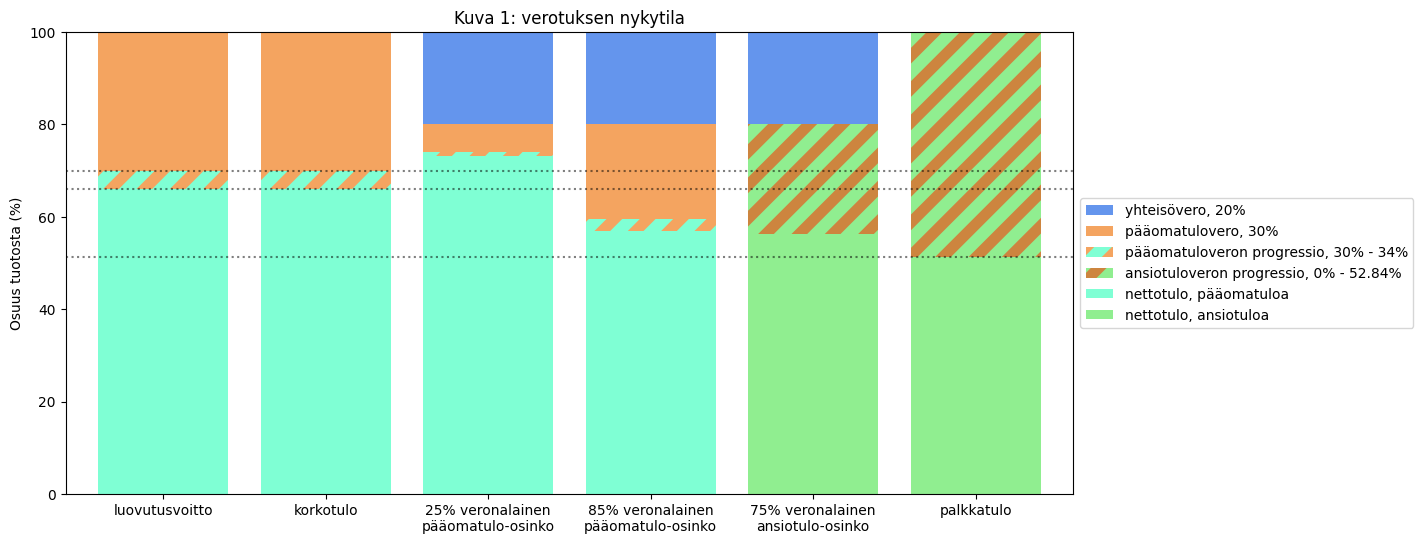

In [2]:
data = local.Data().sale().interest().div(25).div(85).dive(75).wage()
fig = plt.figure(figsize=(13, 6))
data.plot(plt.gca(), "Kuva 1: verotuksen nykytila")
plt.savefig("osinkoverotus/kuva1.png", bbox_inches="tight")

Luovutusvoiton ja korkotulon tapauksessa laskelma on tehty sillä oletuksella, että koko tuotto on saatu vähennettyä verotuksessa. Korkein ansiotuloveroprosentti on laskettu käyttämällä keskimääräistä kunnallisveroa (7,46%) ja kirkollisveroa (1,38%) eikä sisällä TVM:ää eikä TyEL:iä. Palkan tapauksessa verotettavasta ansiotulosta on vähennetty niiden mukainen 7,94%.

Verotus vaihtelee huomattavasti eri tuloutustapojen välillä. Yrittäjä luonnollisesti haluaa tulonsa mieluiten sellaiseen palkkiin, josta hän saa pitää mahdollisimman suuren osan, eli jonka vihreä osa on korkein. Sitä, mihin palkkiin tulot osuvat, ei sinänsä saa vapaasti valita, mutta siihen voi vaikuttaa verosuunnittelulla. Verotus kannustaa karkeasti kahdenlaiseen suunnitteluun: jos saa ansiotuloja, ne kannattaa järjestää niin, että ne laskettaisiin pääomatuloiksi (tulonmuunto); jos saa pääomatuloja, ne kannattaa järjestää niin, että ne osuvat mahdollisesti kevyesti verotettuun palkkiin.

Nykyinen verotus on _epäneutraalia_ sekä ansiotulojen ja pääomatulojen välillä että pääomatulojen sisällä. Epäneutraalista verotuksesta voi aiheutua pääomien tehotonta käyttöä ja verotuksen epäoikeudenmukaista kohdentumista. Lisäksi verotuksen optimointiin kulutetulle energialle olisi parempaakin käyttöä.

## Neutraali ja epäneutraali verotus

Listaamattoman yrityksen pääoma on usein alun perin yrittäjän pääomaa ja yrityksessä tehty työ yrittäjän työtä. Siksi sen verotukseen on kiinnitettävä erityistä huomiota.

Yhtäältä haluamme verottaa yrittäjän työtuloa johdonmukaisesti ansiotulona, emmekä antaa sille massiivista veronalennusta vain sillä perusteella että se tapahtuu omassa yrityksessä (kohtelemalla sitä pääomatulona). Toisaalta haluamme verottaa yrittäjän sijoittaman pääoman tuottoa johdonmukaisesti pääomatulona, emmekä antaa sille massiivista veronkorotusta vain sillä perusteella, että se sijoitettiin omaan yritykseen (kohtelemalla sitä ansiotulona).

Ei kuitenkaan ole olemassa mitään ilmeistä tapaa rajata, mikä osuus yrityksen tuotosta johtuu työstä ja mikä pääomasta. Haasteena on muun muassa, että työn ja pääoman keskinäinen rooli yrityksen liiketoiminnassa vaihtelee suuresti: konsulttifirma voi perustua käytännössä kokonaan asiantuntijatyöhön ja omistaa kenties vain muutaman tietokoneen, kun taas esimerkiksi liiketilaa vuokraava yritys perustuu suurelta osin pääoman tuottoon.

### Pääoman tuotto yrityksessä

Pääomatulojen verotuksen olisi suotavaa olla neutraalia, jotta pääomat tulisivat tehokkaasti hyödynnetyiksi.

Ajatellaan yrittäjää, joka on sijoittamassa henkilökohtaisia varojaan. Hän voi sijoittaa omaan yritykseensä joko suoraan tai lainaamalla sille rahaa. Vaihtoehtona on myös sijoittaa muualle, esimerkiksi sijoitusasuntoihin tai pörssiin. Jos hän sijoittaa omaan yritykseensä, pääomalle saatu tuotto voidaan sijoittaa edelleen joko samaan yritykseen (tekemällä investointeja) tai muualle (jolloin rahat pitää ensin nostaa yrityksestä osinkona tai korkona). Toivottavaa olisi, että päätös tehtäisiin sen mukaan, missä pääoma on parhaassa käytössä, ei sen mukaan, mitä verotuksessa satutaan suosimaan.

Jos pääomatulo-osingon verotuksessa ei olisi minkäänlaista huojennusta, tai jos osinkoa jopa pidettäisiin kokonaan ansiotulona, osinkotulo olisi paljon kireämmin verotettua kuin korkotulo tai yrityksen kasvattamisesta seuraava luovutusvoitto (kuva 2). Tällöin yrittäjän kannattaisi pääomittaa yritystä mieluummin lainaamalla sille rahaa kuin sijoittamalla suoraan, jotta pääoman tuotto välttyisi yhteisöverolta. Näin syntyisi heikkotaseisia yrityksiä, jotka kestävät huonosti talouden shokkeja.

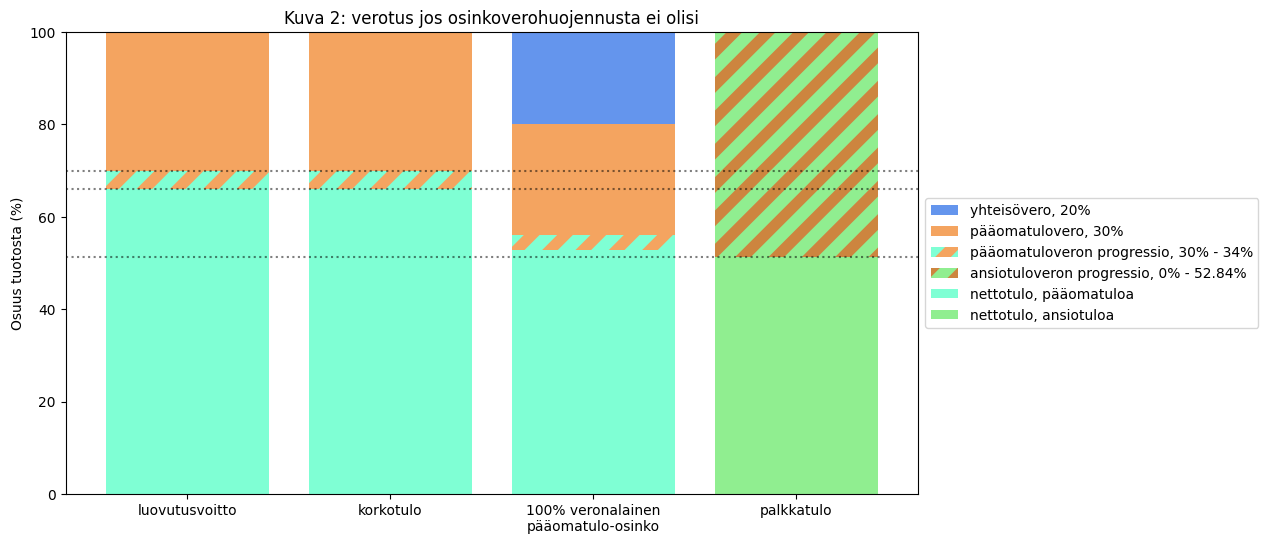

In [3]:
data = local.Data().sale().interest().div(100).wage()
fig = plt.figure(figsize=(11, 6))
data.plot(plt.gca(), "Kuva 2: verotus jos osinkoverohuojennusta ei olisi")
plt.savefig("osinkoverotus/kuva2.png", bbox_inches="tight")

Toisaalta jos yrityksellä on merkittävästi tuottavaa pääomaa, mutta ei kovin hyviä jatkoinvestointikohteita, olisi suotavaa että tuotto nostettaisiin ulos yrityksestä niin, että sen voi investoida muualle. Osinkojen erityisen kireä verotus kuitenkin kannustaa yritystä mieluummin tekemään heikkojakin omia investointeja, jotta vältytään yhteisöverolta.

Nykyinen huojennus toimii niin, että listaamattoman yrityksen pääomatulo-osingosta 25% on veronalaista 150 000 euroon asti, siitä eteenpäin 85%. Pörssiyhtiön osingosta veronalaista on aina 85%.

### Työn tuotto yrityksessä

Työn kohdalla neutraalisuuden ongelma on tulolajien välinen.

Yhtäältä on järkevää, että pääoman tuotto yrityksen sisällä voidaan tulouttaa pääomatulona ja pääomatulolle tavanomaisella verotuksella. Jos näin ei ole, esimerkiksi jos pääomatulo-osinkoa ei huojenneta tai jos osinkoa pidetään kokonaan ansiotulona, seuraa edellisessä osiossa kuvattuja vääristyneitä kannustimia, joiden seurauksena pääomat kohdentuvat huonosti, haitaten koko taloutta.

Toisaalta tarkoitus on, että työn tuotto tuloutetaan ansiotulona, vaikka se tapahtuisi yrityksen sisällä. Jos kaikkea osinkoa verotettaisiin aina pääomatulona, kyllin suurituloisen yrittäjän kannattaisi tulouttaa myös työnsä tuotto säännönmukaisesti osinkona (nostettuaan ensin palkkaa siihen asti, että ansiotulon progression ansiosta kevyemmin verotettu osuus on käytetty). Tätä kutsutaan _tulonmuunnoksi_, sillä työn tuotto, joka on "oikeasti" ansiotuloa, "muunnetaan" pääomatuloksi.

Tämän ongelman ratkaisemiseksi järjestelmään sisältyy sääntö, jonka mukaan osinko jaetaan pääomatulo-osingoksi ja ansiotulo-osingoksi: pääomatulo-osinkoa on korkeintaan 8% osakkeisiin liittyvästä omasta pääomasta (osakkeiden matemaattisesta arvosta) vuodessa, loput on ansiotulo-osinkoa. Tässä ikään kuin oletetaan, että yrityksen pääoman nimellinen tuotto on tasainen 8%, ja hyväksytään tuon verran osinkoa olevan pääomatuloa.

Todellisuudessa pääoman tuotto on tietysti vaihtelevaa ja usein alle 8%. Tällöin "ylimääräinen" pääomatuloksi hyväksytty osinko tarjoaa mahdollisuuden tulonmuuntoon. Tilastot viittaavat siihen, että tätä mahdollisuutta myös käytetään: on esimerkiksi varsin tavallista nostaa säännönnmukaisesti maksimimäärä pääomatulo-osinkoa, jos siihen on mahdollisuus, aina 150 000 euron rajaan asti. Tämä tulonmuunto ei vaadi sen kummempia järjestelyitä, vaan on helposti tehtävissä kaikille listaamattomille yrityksille, joilla on merkittäviä määriä omaa pääomaa. Kannattaa kuitenkin huomata, että tuon oman pääoman on kohtuullista katsoa todellisuudessakin tuottaneen jotain; tulonmuuntoa ei siis ole pääomatulo-osinko kokonaan, vain se osa, joka ylittää pääoman todellisen tuoton.

Edellä kuvattua yksinkertaista tulonmuuntoa pitemmälle mennään, kun yrityksen tasearvoa paisutetaan keinotekoisesti (mutta laillisesti) esimerkiksi viime aikoina uutisissa mainitulla holdingyhtiöjärjestelyllä. Oikeammin sanottuna holdingyhtiön tasetta paisutetaan alkuperäisellä yhtiöllä, jolle lasketaan paljon suurempi arvo kuin sen omasta pääomasta seuraisi, ja osingon maksaa holdingyhtiö. Tällöin valtaosa pääomatulo-osingosta voi olla tulonmuuntoa.

## Uudistamisen vaihtoehdot

Osinkoverotuksen uudistaminen on monimutkaista. Ihanteellista olisi, että verotus kohtelisi kaikkia tuloutusmuotoja (kuvissa esiintyviä palkkeja) samalla tavalla, jolloin tulonmuunto ei olisi ongelma ja pääomat kohdistuisivat tehokkaasti. Tämä ei kuitenkaan käytännössä onnistu, kun pääomatuloja ja ansiotuloja pohjimmiltaan verotetaan niin eri tavalla, joten tarvitaan kompromissiratkaisu.

(Periaatteessa riittäisi myös, jos kaikkia pääomatuloja kohdeltaisiin keskenään samalla tavalla ja tulonmuunto voitaisiin estää. Tällöin pitäisi kuitenkin jotenkin tietää, mikä osuus tuotosta "oikeasti" johtuu pääomasta ja mikä työstä, mikä ei käytännössä ole mahdollista.)

Kommentoin tässä kahta varsin erilaista ehdotusta järjestelmän korjaamiseksi. Ehdotukset painottavat keskenään eri asioita ja tekevät keskenään erilaisia kompromisseja. Kommentoin myös paria vaihtoehtoa, jossa mennään pelkän osinkoverotuksen säätämistä pitemmälle.

### Yritysverotuksen asiantuntijatyöryhmän ehdotus, 2017

Valtionvarainministeriölle vuonna 2017 laadittu [yritysverotuksen asiantuntijatyöryhmän raportti](https://vm.fi/documents/10623/3779937/Yritysverotuksen+asiantuntijaty%C3%B6ryhm%C3%A4n+raportti/7d12dd61-2065-4cdd-bda4-a953fd2f56c0/Yritysverotuksen+asiantuntijaty%C3%B6ryhm%C3%A4n+raportti.pdf?t=1486622052000) esittää osinkoverotukseen seuraavia muutoksia (kuva 3):

* Lasketaan pääomatulo-osingon määräytymisprosentti 8%:sta 4%:iin (ei kuvassa)
* Nostetaan pääomatulo-osingon veronalainen osuus 40%:iin
* Poistetaan 150 000 euron raja (eli porrastus 85% veronalaiseksi)

Veronalaisen osuuden nostaminen 40%:iin tekee sen, että pääomatulo-osingon verotus nousee suunnilleen samalle tasolle pääomatuloveron alemman portaan kanssa, noin 30%:iin. Verotus tulisi suhteellisen neutraaliksi pääomatulojen kesken.

Malli myös poistaa 85% veronalaisen pääomatulo-osingon kokonaan, eli myös yli 150 000 euron osingot olisivat 40% veronalaisia. Tämä perustuu havaintoon, että yritykset erityisen usein maksavat juuri tuon rajan verran osinkoa, mutta eivät enempää. Verotus vaikuttaa ohjaavan käyttäytymistä vahvasti, mikä yleensä ei ole toivottavaa.

Ansiotulot ja pääomatulot ovat tässä mallissa edelleen varsin epäneutraalisti verotettuja. Tulonmuuntoon puututaan alentamalla pääomatulo-osingon määräytymisprosenttia, jolloin yrittäjälle jää huomattavasti vähemmän ylimääräistä "pääomatulobudjettia". Toisaalta moni pääomaerä voi oikeastikin tuottaa merkittävästi enemmän kuin 4%, ja sellaisia verotettaisiin nyt ansiotuloina. Lisäksi taseen paisuttamiseen perustuva veronsuunnittelu toimisi edelleen, vaikkakin vähemmän tehokkaasti kuin aikaisemmin.

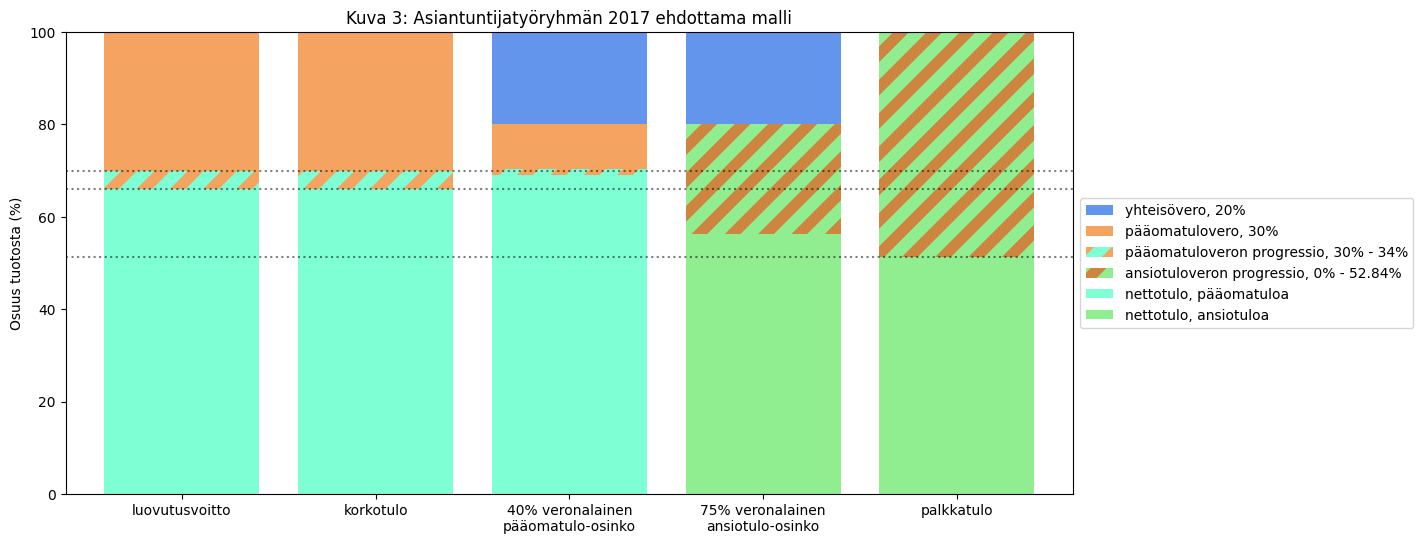

In [4]:
data = local.Data().sale().interest().div(40).dive(75).wage()
fig = plt.figure(figsize=(13, 6))
data.plot(plt.gca(), "Kuva 3: Asiantuntijatyöryhmän 2017 ehdottama malli")
plt.savefig("osinkoverotus/kuva3.png", bbox_inches="tight")

#### Mukautettu vaihtoehto: 55% veronalainen pääomatulo-osinko

Jos veronalainen osuus olisikin 55%, verotus olisi neutraali 34% pääomatuloveroasteeseen verrattuna, kun 40% veronalaisella osuudella se on neutraali 30% pääomatuloveroasteeseen verrattuna.

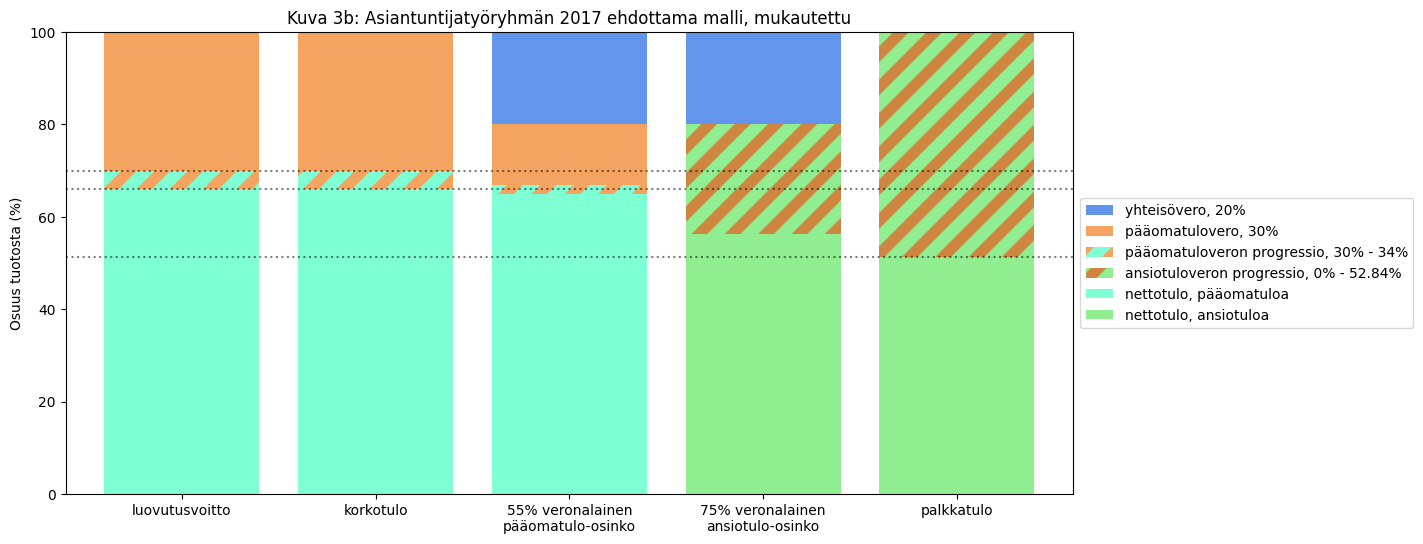

In [5]:
data = local.Data().sale().interest().div(55).dive(75).wage()
fig = plt.figure(figsize=(13, 6))
data.plot(plt.gca(), "Kuva 3b: Asiantuntijatyöryhmän 2017 ehdottama malli, mukautettu")
plt.savefig("osinkoverotus/kuva3b.png", bbox_inches="tight")

### Reformi 9 raportista _Lisää verotuloja reilusti_, 2024

Lauri Finérin [raportti](https://sorsafoundation.fi/wp-content/uploads/lauri-finer-lisaa-verotuloja-reilusti.pdf) osinkoverotuksesta tarjoaa varsin toisenlaisen ehdotuksen, tai oikeastaan useita vaihtoehtoisia ehdotuksia. Raportin kannattamille reformeille (5, 6, 8 ja 9) on yhteistä, että ne laskevat osingon kokonaan pääomatuloksi (eli ansiotulo-osinko poistuu), mutta kiristävät sen verotusta lähelle ansiotuloja. Ehdotuksissa myös käsitellään listattujen ja listaamattomien yritysten osinkoja yhtäläisesti.

Reformi 9 on raportin vaihtoehdoista laajin, ja esitetään kuvassa 4. Veronalainen osuus on porrastettu osingon määrän mukaan ja saavuttaa korkeimman tasonsa 50 000 euron kohdalla vuodessa. (Reformin 8 palkit ovat muuten samat, mutta 50% veronalainen pääomatulo-osinko puuttuu; reformissa 5 osingot ovat 85% veronalaisia ja reformissa 6 ne ovat 100% veronalaisia, ilman porrastusta.) 

Finérin analyysi vaikuttaa perustuvan kokonaan ansiotulojen ja pääomatulojen väliseen neutraaliuteen sekä tulonmuuntoon, unohtaen pääomatulojen sisäisen neutraaliuden kokonaan. Tämä merkittäviltä osin ratkaisisi tulonmuunto-ongelman, mutta samalla kärjistäisi pääomatulojen epäneutraaliin verotukseen liittyviä ongelmia, joista puhuttiin yllä. 

(Sivuhuomiona, minusta ei ole tarkoituksenmukaista leipoa progressiota osinkoverotuksen järjestelmään sisään. Jos progressiota halutaan, se olisi johdonmukaisempaa tuoda pääomatuloveroasteikkoon sinänsä.)

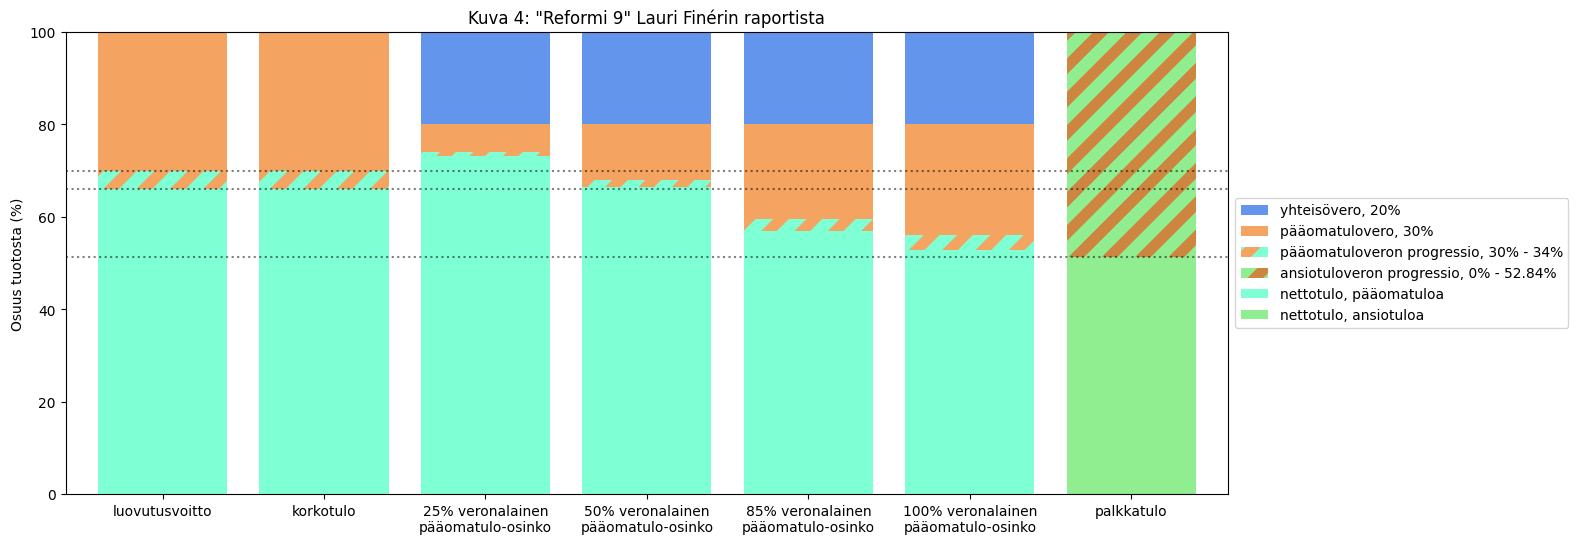

In [6]:
data = local.Data().sale().interest().div(25).div(50).div(85).div(100).wage()
fig = plt.figure(figsize=(15, 6))
data.plot(plt.gca(), "Kuva 4: \"Reformi 9\" Lauri Finérin raportista")
plt.savefig("osinkoverotus/kuva4.png", bbox_inches="tight")

### Laajempi verotusuudistus

Tulonmuunnon ongelma on pohjimmiltaan se, että ansiotuloja ja pääomatuloja halutaan yhtäältä kohdella verotuksessa vahvasti eri tavalla, mutta toisaalta niitä ei osata tyydyttävästi erottaa toisistaan.

Tavallaan helpoin ratkaisu on yksinkertaisesti tuoda pääomatulojen ja ansiotulojen verotus ylipäänsä lähemmäksi toisiaan. Oikeastihan tämä ei ole lainkaan helppoa eikä yksinkertaista, koska niin pääomatuloveron ylimmän asteen nostaminen kuin ansiotuloveron ylimmän asteen laskeminen on sekä poliittisesti äärimmäisen tulenarkaa että vaikutuksiltaan riskialtista. Mutta voimme sentään katsoa, millaisiin tuloksiin näin olisi teoriassa mahdollista päästä. Molemmissa tapauksissa ansiotulo-osinko poistuu ja jäljelle jäävä pääomatulo-osinko on huojennettu.

Kuva 5a näyttää vaihtoehdon, jossa verolajeja lähennetään ulottamalla pääomatuloveroprosentti 48%:iin. Osingosta 75% on veronalaista.

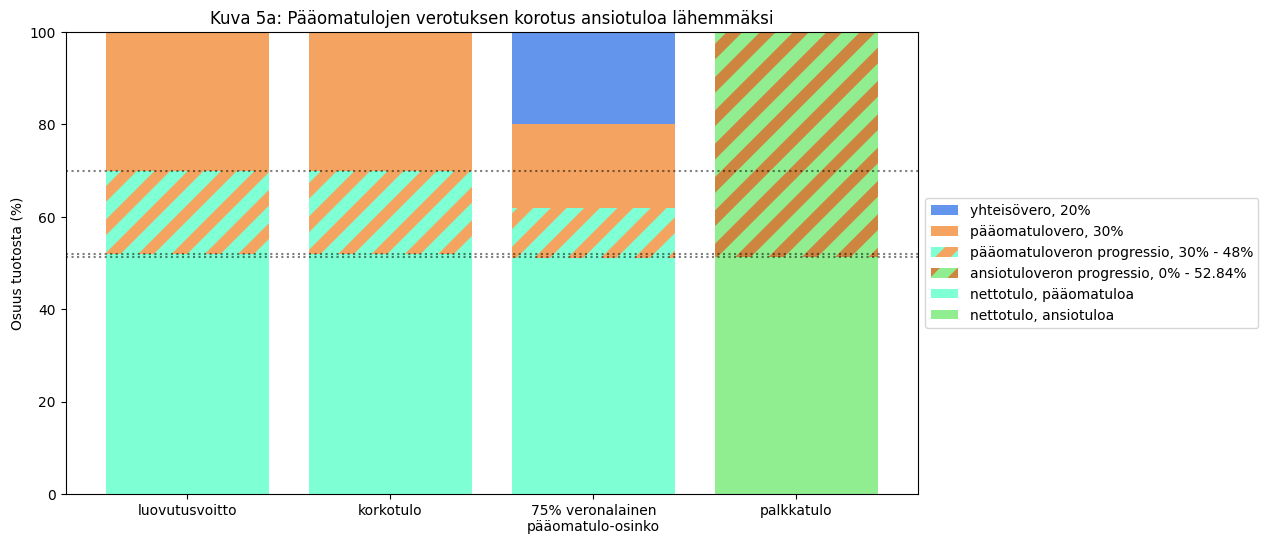

In [7]:
data = local.Data(20, 30, 48, 0, 52.84).sale().interest().div(75).wage()
fig = plt.figure(figsize=(11, 6))
data.plot(plt.gca(), "Kuva 5a: Pääomatulojen verotuksen korotus ansiotuloa lähemmäksi")
plt.savefig("osinkoverotus/kuva5a.png", bbox_inches="tight")

Kuva 5b näyttää vaihtoehdon, jossa verolajeja lähennetään pääasiassa laskemalla ansiotuloveron progressio 40%:iin. Lisäksi pääomatuloveroprosentti ulotetaan 36%:iin. Osingosta 55% on veronalaista.

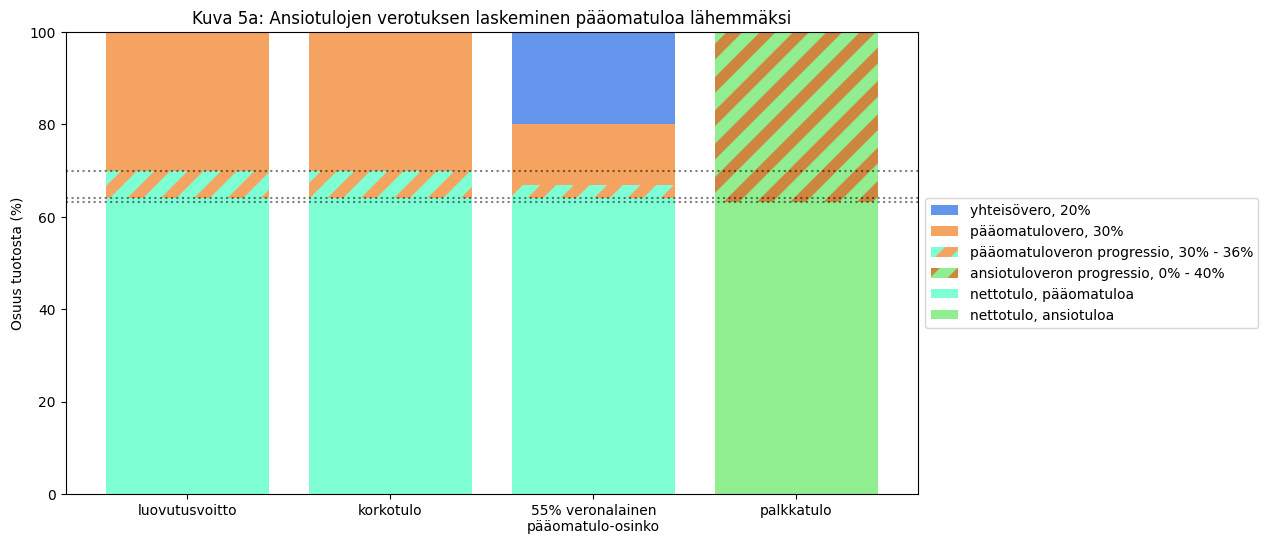

In [8]:
data = local.Data(20, 30, 36, 0, 40).sale().interest().div(55).wage()
fig = plt.figure(figsize=(11, 6))
data.plot(plt.gca(), "Kuva 5a: Ansiotulojen verotuksen laskeminen pääomatuloa lähemmäksi")
plt.savefig("osinkoverotus/kuva5b.png", bbox_inches="tight")